Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 60 files belonging to 3 classes.
Using 48 files for training.
Found 60 files belonging to 3 classes.
Using 12 files for validation.
x_train shape: (48, 32, 32, 3)
y_train shape: (48,)
x_test shape: (12, 32, 32, 3)
y_test shape: (8,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               921900    
                                                                 
 dense_11 (Dense)            (None, 170)               51170     
                                                                 
 dense_12 (Dense)            (None, 90)                15390     
                                                                 
 dense_13 (Dense)            (None, 30)                2730      
                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 115ms/step


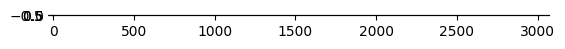

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

train_dir = '/content/drive/MyDrive/FR'
batch_size = 20
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

x_train, y_train = [], []
x_test, y_test = [], []

for images, lables in train_ds:
  x_train.append(images)
  y_train.append(lables)

for images, labels in val_ds:
  x_test.append(images)
  y_test.append(lables)

import numpy as np
x_train = np.concatenate(x_train, axis = 0)
x_test = np.concatenate(x_test, axis = 0)
y_train = np.concatenate(y_train, axis = 0)
y_test = np.concatenate(y_test, axis = 0)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

from keras.models import Sequential
from keras.layers import Dense, Activation

x_train = x_train.reshape((48, 32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((12, 32*32*3))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

model=Sequential()
model.add(Dense(300, input_shape=(32*32*3,), activation = 'relu'))
model.add(Dense(170, activation = 'relu'))
model.add(Dense(90, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 150, batch_size = 20)

from keras.models import load_model
model.save('sequential_2.h5')
sequential_2 = load_model('/content/sequential_2.h5')

from keras.utils import load_img

img=load_img('/content/test.jpg', target_size = (32,32))

# Prediction
# Chuyển array
from keras.utils import load_img, img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)

#Chuyển floattype
img = img.astype('float32')/255
import numpy as np
np.argmax(model.predict(img), axis = -1)

import matplotlib.pyplot as plt
plt.imshow(img)